# Yuumi Insurance EDA

In [1]:
# import basic libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime
%matplotlib inline

# data visualisation
#import missingno
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')

# preprocessing - encoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from nltk.tokenize import WordPunctTokenizer

import json
from pandas.io.json import json_normalize
#json_normalize(msglog['message'])

# Clean/Process Data

In [2]:
# make column width bigger when displaying columns
pd.set_option("display.max_colwidth", 1000)
pd.set_option("display.max_columns", None)

In [3]:
# load in log data with time taken to load recorded
start_time = time.time()
log = pd.read_csv('Dataset/data.csv')
log_time = (time.time() - start_time)
log_time

19.533705949783325

In [4]:
# look at data, we can check the columns by log.message/log.timestamp
# also log.message[0] shows first value for log.message
log.head()

,message,timestamp
0,8f70c7577be8483 - mobile_browser - Quote Started for customer: 99ccf1,1.483193e+09
1,"1368d40a4f6e455 - mobile_browser - Quote Completed for customer: 99ccf1 with json payload {'name': 'Nicole Berry', 'email': 'Nicole Berry@hotmail.com', 'gender': 'male', 'age': 29, 'home': {'type': 1, 'square_footage': 311.80361967382737, 'number_of_bedrooms': 2, 'number_of_floors': 1}, 'household': [{'name': 'Oscar Berry', 'age': 25, 'gender': 'female'}, {'name': 'Mark Berry', 'age': 10, 'gender': 'female'}, {'name': 'Jacqueline Berry', 'age': 14, 'gender': 'male'}], 'address': '66 Lake Jamieview,PSC '}",1.483194e+09
2,90527688b31d445 - mobile_browser - Claim Started for customer: 99ccf1,1.483194e+09
3,c4013f44ea6d40c - mobile_browser - Payment Completed for customer: 99ccf1,1.483194e+09
4,8045614075e7466 - pc_browser - Quote Started for customer: 9bae09,1.483196e+09


In [5]:
# shows columns and the data types of columns
log.dtypes

message       object
timestamp    float64
dtype: object

In [6]:
# create data frame which will store new column names from log data
timelog = pd.DataFrame()

In [7]:
# function for converting time into datetime (local)
def convert_time(d):
    return time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(d))

In [8]:
# put the timestamp column from log data into new timelog dataframe, while also converting it to datetime format
timelog['timestamp'] = log['timestamp'].apply(convert_time)

In [9]:
# functions to get the date and the time separately
def get_date(d):
    return d[:10]
def get_time(d):
    return d[11:]

In [10]:
# put date and time into timelog df
timelog['DATE'] = timelog.timestamp.apply(get_date)
timelog['TIME'] = timelog.timestamp.apply(get_time)

In [11]:
timelog.head()

,timestamp,DATE,TIME
0,2017-01-01 01:00:00,2017-01-01,01:00:00
1,2017-01-01 01:14:36,2017-01-01,01:14:36
2,2017-01-01 01:16:34,2017-01-01,01:16:34
3,2017-01-01 01:16:34,2017-01-01,01:16:34
4,2017-01-01 02:00:00,2017-01-01,02:00:00


In [12]:
# create msglog for manipulating message data
msglog = pd.DataFrame()
msglog['message'] = log['message']

In [13]:
msglog.head()

,message
0,8f70c7577be8483 - mobile_browser - Quote Started for customer: 99ccf1
1,"1368d40a4f6e455 - mobile_browser - Quote Completed for customer: 99ccf1 with json payload {'name': 'Nicole Berry', 'email': 'Nicole Berry@hotmail.com', 'gender': 'male', 'age': 29, 'home': {'type': 1, 'square_footage': 311.80361967382737, 'number_of_bedrooms': 2, 'number_of_floors': 1}, 'household': [{'name': 'Oscar Berry', 'age': 25, 'gender': 'female'}, {'name': 'Mark Berry', 'age': 10, 'gender': 'female'}, {'name': 'Jacqueline Berry', 'age': 14, 'gender': 'male'}], 'address': '66 Lake Jamieview,PSC '}"
2,90527688b31d445 - mobile_browser - Claim Started for customer: 99ccf1
3,c4013f44ea6d40c - mobile_browser - Payment Completed for customer: 99ccf1
4,8045614075e7466 - pc_browser - Quote Started for customer: 9bae09


In [14]:
# split message, put into new variable, new columns for transaction id, device 
splitmsg1 = pd.DataFrame(log.message.str.split('-',2).tolist(), columns = ['transaction_id', 'device', 'message'])

In [15]:
splitmsg1.head()

,transaction_id,device,message
0,8f70c7577be8483,mobile_browser,Quote Started for customer: 99ccf1
1,1368d40a4f6e455,mobile_browser,"Quote Completed for customer: 99ccf1 with json payload {'name': 'Nicole Berry', 'email': 'Nicole Berry@hotmail.com', 'gender': 'male', 'age': 29, 'home': {'type': 1, 'square_footage': 311.80361967382737, 'number_of_bedrooms': 2, 'number_of_floors': 1}, 'household': [{'name': 'Oscar Berry', 'age': 25, 'gender': 'female'}, {'name': 'Mark Berry', 'age': 10, 'gender': 'female'}, {'name': 'Jacqueline Berry', 'age': 14, 'gender': 'male'}], 'address': '66 Lake Jamieview,PSC '}"
2,90527688b31d445,mobile_browser,Claim Started for customer: 99ccf1
3,c4013f44ea6d40c,mobile_browser,Payment Completed for customer: 99ccf1
4,8045614075e7466,pc_browser,Quote Started for customer: 9bae09


In [16]:
# from remaining message in splitmsg1, split the action from remaining message into splitmsg2
splitmsg2 = pd.DataFrame(splitmsg1.message.str.split(':',1).tolist(), columns = ['action', 'message'])
splitmsg2['customer_id'] = splitmsg2['message'].str.split().str[0]

In [17]:
msglog['customer_id'] = splitmsg2['customer_id']
splitmsg2.head()

,action,message,customer_id
0,Quote Started for customer,99ccf1,99ccf1
1,Quote Completed for customer,"99ccf1 with json payload {'name': 'Nicole Berry', 'email': 'Nicole Berry@hotmail.com', 'gender': 'male', 'age': 29, 'home': {'type': 1, 'square_footage': 311.80361967382737, 'number_of_bedrooms': 2, 'number_of_floors': 1}, 'household': [{'name': 'Oscar Berry', 'age': 25, 'gender': 'female'}, {'name': 'Mark Berry', 'age': 10, 'gender': 'female'}, {'name': 'Jacqueline Berry', 'age': 14, 'gender': 'male'}], 'address': '66 Lake Jamieview,PSC '}",99ccf1
2,Claim Started for customer,99ccf1,99ccf1
3,Payment Completed for customer,99ccf1,99ccf1
4,Quote Started for customer,9bae09,9bae09


In [18]:
# put all the data together
msglog['transaction_id'] = splitmsg1['transaction_id']
msglog['device'] = splitmsg1['device']
msglog['action'] = splitmsg2['action']
msglog.head()

,message,customer_id,transaction_id,device,action
0,8f70c7577be8483 - mobile_browser - Quote Started for customer: 99ccf1,99ccf1,8f70c7577be8483,mobile_browser,Quote Started for customer
1,"1368d40a4f6e455 - mobile_browser - Quote Completed for customer: 99ccf1 with json payload {'name': 'Nicole Berry', 'email': 'Nicole Berry@hotmail.com', 'gender': 'male', 'age': 29, 'home': {'type': 1, 'square_footage': 311.80361967382737, 'number_of_bedrooms': 2, 'number_of_floors': 1}, 'household': [{'name': 'Oscar Berry', 'age': 25, 'gender': 'female'}, {'name': 'Mark Berry', 'age': 10, 'gender': 'female'}, {'name': 'Jacqueline Berry', 'age': 14, 'gender': 'male'}], 'address': '66 Lake Jamieview,PSC '}",99ccf1,1368d40a4f6e455,mobile_browser,Quote Completed for customer
2,90527688b31d445 - mobile_browser - Claim Started for customer: 99ccf1,99ccf1,90527688b31d445,mobile_browser,Claim Started for customer
3,c4013f44ea6d40c - mobile_browser - Payment Completed for customer: 99ccf1,99ccf1,c4013f44ea6d40c,mobile_browser,Payment Completed for customer
4,8045614075e7466 - pc_browser - Quote Started for customer: 9bae09,9bae09,8045614075e7466,pc_browser,Quote Started for customer


In [19]:
msglog.action.value_counts()

 Claim Started for customer        826795
 Claim Accepted for customer       816301
 Quote Started for customer        632998
 Quote Completed for customer      523322
 Payment Completed for customer    225921
 Policy Cancelled for customer     156327
 Quote Incomplete for customer     109676
 Claim Denied for customer          10494
Name: action, dtype: int64

In [20]:
# look for values in column action with denied message
denied = msglog['action']==" Claim Denied for customer"

In [21]:
# just denied claims
denied_claims = msglog[denied]

In [22]:
#split message into json_payload and message
splitmsg3 = pd.DataFrame()
splitmsg3['message'] = msglog['message'].str.split('json payload',1).str[0]
splitmsg3['json_payload'] = msglog['message'].str.split('json payload',1).str[1]

In [23]:
#read json_payload and message into msglog
msglog['json_payload'] = splitmsg3['json_payload']
msglog['message'] = splitmsg3['message']

In [24]:
#remove stuff in between later

In [34]:
saved = msglog #cause I ceebs waiting
msglog = saved.head(5000)

In [35]:
#remove stuff in between

In [36]:
#different types of quotes
msglog['action'].value_counts()

 Quote Started for customer        2100
 Quote Completed for customer      1748
 Payment Completed for customer     684
 Quote Incomplete for customer      346
 Claim Started for customer          75
 Claim Denied for customer           32
 Policy Cancelled for customer        9
 Claim Accepted for customer          6
Name: action, dtype: int64

In [37]:
#create columns (initialise to nan)
msglog['name'] = np.nan
msglog['email'] = np.nan
msglog['gender'] = np.nan
msglog['home'] = np.nan
msglog['age'] = np.nan
msglog['household'] = np.nan
msglog['address'] = np.nan
msglog['fraud'] = 0

msglog.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,message,customer_id,transaction_id,device,action,json_payload,name,email,gender,home,age,household,address,fraud
0,8f70c7577be8483 - mobile_browser - Quote Started for customer: 99ccf1,99ccf1,8f70c7577be8483,mobile_browser,Quote Started for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1368d40a4f6e455 - mobile_browser - Quote Completed for customer: 99ccf1 with,99ccf1,1368d40a4f6e455,mobile_browser,Quote Completed for customer,"{'name': 'Nicole Berry', 'email': 'Nicole Berry@hotmail.com', 'gender': 'male', 'age': 29, 'home': {'type': 1, 'square_footage': 311.80361967382737, 'number_of_bedrooms': 2, 'number_of_floors': 1}, 'household': [{'name': 'Oscar Berry', 'age': 25, 'gender': 'female'}, {'name': 'Mark Berry', 'age': 10, 'gender': 'female'}, {'name': 'Jacqueline Berry', 'age': 14, 'gender': 'male'}], 'address': '66 Lake Jamieview,PSC '}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,90527688b31d445 - mobile_browser - Claim Started for customer: 99ccf1,99ccf1,90527688b31d445,mobile_browser,Claim Started for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,c4013f44ea6d40c - mobile_browser - Payment Completed for customer: 99ccf1,99ccf1,c4013f44ea6d40c,mobile_browser,Payment Completed for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,8045614075e7466 - pc_browser - Quote Started for customer: 9bae09,9bae09,8045614075e7466,pc_browser,Quote Started for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Add fraud column

In [38]:
#fraud dataframe
fraud_col = pd.DataFrame(msglog['message'].str.split('fraud').tolist(), columns = ['message', 'fraud'])
fraud_col = pd.get_dummies(fraud_col, prefix_sep="", columns=['fraud'])

#merge fraud dataframe with msglog
msglog['fraud'] = fraud_col['fraud']
msglog.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,message,customer_id,transaction_id,device,action,json_payload,name,email,gender,home,age,household,address,fraud
0,8f70c7577be8483 - mobile_browser - Quote Started for customer: 99ccf1,99ccf1,8f70c7577be8483,mobile_browser,Quote Started for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1368d40a4f6e455 - mobile_browser - Quote Completed for customer: 99ccf1 with,99ccf1,1368d40a4f6e455,mobile_browser,Quote Completed for customer,"{'name': 'Nicole Berry', 'email': 'Nicole Berry@hotmail.com', 'gender': 'male', 'age': 29, 'home': {'type': 1, 'square_footage': 311.80361967382737, 'number_of_bedrooms': 2, 'number_of_floors': 1}, 'household': [{'name': 'Oscar Berry', 'age': 25, 'gender': 'female'}, {'name': 'Mark Berry', 'age': 10, 'gender': 'female'}, {'name': 'Jacqueline Berry', 'age': 14, 'gender': 'male'}], 'address': '66 Lake Jamieview,PSC '}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,90527688b31d445 - mobile_browser - Claim Started for customer: 99ccf1,99ccf1,90527688b31d445,mobile_browser,Claim Started for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,c4013f44ea6d40c - mobile_browser - Payment Completed for customer: 99ccf1,99ccf1,c4013f44ea6d40c,mobile_browser,Payment Completed for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,8045614075e7466 - pc_browser - Quote Started for customer: 9bae09,9bae09,8045614075e7466,pc_browser,Quote Started for customer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [39]:
"""

redundant VERY slow code


start_time = time.time()

def add_fraud_col(dataframe):
    
    function that reads the message column in dataframe and adds a fraud column to dataframe. 
    
    1 is fraudulent, 0 is non-fraudulent
    
    for index, row in dataframe.iterrows():
        
        #find string
        string = str(dataframe.loc[index, 'message'])
        
        #print(string)
        #if string contains a fraud
        if(string.find('fraud')!=-1):
            
            dataframe.loc[index, 'fraud'] = 1
            
add_fraud_col(msglog)
log_time = (time.time() - start_time)
log_time"""

"\n\nredundant VERY slow code\n\n\nstart_time = time.time()\n\ndef add_fraud_col(dataframe):\n    \n    function that reads the message column in dataframe and adds a fraud column to dataframe. \n    \n    1 is fraudulent, 0 is non-fraudulent\n    \n    for index, row in dataframe.iterrows():\n        \n        #find string\n        string = str(dataframe.loc[index, 'message'])\n        \n        #print(string)\n        #if string contains a fraud\n        if(string.find('fraud')!=-1):\n            \n            dataframe.loc[index, 'fraud'] = 1\n            \nadd_fraud_col(msglog)\nlog_time = (time.time() - start_time)\nlog_time"

Convert JSON column to dataframe

In [ ]:
"""

trying to improve performance of JSON_to_dataframe function
not finished
fck me JSON_to_dataframe is too slow


test = saved
test.head()


testing = pd.DataFrame(test['json_payload'].str.split('name').tolist(), columns = ['message'])
testing.head()
"""

In [41]:
def JSON_to_dataframe(dataframe, column_name, begins_with):
    
    """
    function to extract relevant data from string and add them to dataframe.
    
    Data extracted from column name specified by column_name and entered into dataframe at 
    
    column = begins_with + [name extracted from JSON string].
    """
    
    for index, row in dataframe.iterrows():
        
        #find string
        string = str(dataframe.loc[index, column_name])
    
        #if string contains a {
        if(string.find("{")!=-1):
            
            #replace all single quotes with double quotes (doesn't work otherwise idk why)
            string = string.replace("'", '"')

            #read data into json parser
            data = json.loads(string)
            
            #copy name, email etc. into relevant columns
            for keys in data.keys():

                #column
                column = begins_with + str(keys)

                #copy name, email etc. into dataframe
                dataframe.loc[index, column] = str(data[str(keys)])

In [42]:
start_time = time.time()

#extract data from json_payload
JSON_to_dataframe(dataframe = msglog, column_name = 'json_payload', begins_with = '')

#extract data from home
JSON_to_dataframe(dataframe = msglog, column_name = 'home', begins_with = 'home_')

#drop unnecessary columns
if('message' in msglog.columns): 
    msglog = msglog.drop('message', axis=1)
if('json_payload' in msglog.columns): 
    msglog = msglog.drop('json_payload', axis=1)
if('home' in msglog.columns): 
    msglog = msglog.drop('home', axis=1)
    
log_time = (time.time() - start_time)
log_time

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


1133.9419281482697

Group customers by customer_id

In [43]:
#group by customer_id
grouped = msglog.groupby(["transaction_id", "device", "action", "name", "email", "gender", "age", "household", "address", "home_type", "home_square_footage", "home_number_of_bedrooms", "home_number_of_floors"], as_index = False)[["customer_id"]].sum()
grouped.head(3)

,transaction_id,device,action,name,email,gender,age,household,address,home_type,home_square_footage,home_number_of_bedrooms,home_number_of_floors,customer_id
0,001fb590ed3d411,mobile_app,Quote Completed for customer,Ashley Walker,Ashley Walker@gmail.com,male,53,"[{'name': 'Brittany Walker', 'age': 49, 'gender': 'male'}, {'name': 'Michele Walker', 'age': 12, 'gender': 'male'}, {'name': 'Brian Walker', 'age': 13, 'gender': 'female'}]","91 Tonytown, Martinez Meadows Apt.",1,373.9695150875045,2,1,90bc0a
1,0034ff5a6234469,pc_browser,Quote Completed for customer,James Weaver,James Weaver@yahoo.com,male,50,"[{'name': 'John Weaver', 'age': 51, 'gender': 'male'}]","54 Nguyenbury, Lam Throughway Suite",0,195.50685937028786,3,1,3c1b3a
2,004daf6b990d4a3,pc_browser,Quote Completed for customer,Larry Stone,Larry Stone@scott.com,female,34,[],"29 New Kennethshire, Stephanie Freeway Apt.",0,275.65236697556105,2,1,589d90


Creating fraud table that shows: unique customer_id and a 1/0 for fraud

In [44]:
customer_fraud = msglog[['customer_id', 'fraud']]

#group fraudulent customers by 'customer_id' (probs a better method tbh)
fraudulent = customer_fraud.pivot_table(index=['customer_id'], aggfunc=sum)
fraudulent['customer_id1'] = fraudulent.index
fraudulent.index = range(fraudulent.shape[0])

#merge df: 'grouped' and 'fraudulent' on 'customer_id'
merged = pd.merge(grouped, fraudulent, left_on='customer_id', right_on='customer_id1', how='left').drop('customer_id1',axis = 1)
merged.head(2)

,transaction_id,device,action,name,email,gender,age,household,address,home_type,home_square_footage,home_number_of_bedrooms,home_number_of_floors,customer_id,fraud
0,001fb590ed3d411,mobile_app,Quote Completed for customer,Ashley Walker,Ashley Walker@gmail.com,male,53,"[{'name': 'Brittany Walker', 'age': 49, 'gender': 'male'}, {'name': 'Michele Walker', 'age': 12, 'gender': 'male'}, {'name': 'Brian Walker', 'age': 13, 'gender': 'female'}]","91 Tonytown, Martinez Meadows Apt.",1,373.9695150875045,2,1,90bc0a,0
1,0034ff5a6234469,pc_browser,Quote Completed for customer,James Weaver,James Weaver@yahoo.com,male,50,"[{'name': 'John Weaver', 'age': 51, 'gender': 'male'}]","54 Nguyenbury, Lam Throughway Suite",0,195.50685937028786,3,1,3c1b3a,0


Converting household data to a useable df

In [45]:
start_time = time.time()

import ast
def household_to_dataframe(dataframe):
    
    """
    function to create dataframe from household column
    """
    
    #create new df
    new_df = pd.DataFrame(columns = ['customer_id', 'name', 'age', 'gender'])
    
    for row in range(dataframe.shape[0]):
        
        #print("rows = {}".format(row))
        #print("length = {}".format(dataframe.shape[0]))
        
        #get current string
        string = dataframe['household'][row]
        
        #save customer_id
        customer_id = dataframe['customer_id'][row]
        
        #convert string to dict
        dictionary = ast.literal_eval(string)
        
        #use json_normalize to create df 
        normalized_frame = json_normalize(data = dictionary)
        
        #read in customer_id
        normalized_frame['customer_id'] = customer_id
        
        #print(normalized_frame)
        
        #append json_normalize df to new_df
        new_df = new_df.append(normalized_frame, ignore_index = True)
        
        #print(new_df)
        
    return new_df
  
#convert household to useable df
occupants_df = household_to_dataframe(merged)
occupants_df = occupants_df.rename(index=str, columns={"age": "occupant_age", "gender": "occupant_gender", "name": "occupant_name"})

#merge useable df with complete df
merged_final = pd.merge(occupants_df, merged, left_on = 'customer_id', right_on='customer_id', how='left').drop('household', axis =1)
merged_final.head(2)

log_time = (time.time() - start_time)
log_time

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


8.982115030288696

Seperate names for holders and occupants into 'first_name' 'last_name'

In [46]:
#occupants
merged_final.loc[merged_final['occupant_name'].str.split().str.len() == 2, 'occupant_first_name'] = merged_final['occupant_name'].str.split().str[0]
merged_final.loc[merged_final['occupant_name'].str.split().str.len() == 2, 'occupant_last_name'] = merged_final['occupant_name'].str.split().str[-1]

#holders
merged_final.loc[merged_final['name'].str.split().str.len() == 2, 'holder_first_name'] = merged_final['name'].str.split().str[0]
merged_final.loc[merged_final['name'].str.split().str.len() == 2, 'holder_last_name'] = merged_final['name'].str.split().str[-1]

#drop unnecessary columns
if('occupant_name' in merged_final.columns):
    merged_final = merged_final.drop('occupant_name', axis = 1)
    
if('name' in merged_final.columns):
    merged_final = merged_final.drop('name', axis = 1)
    
#rename 'gender' to 'holder_gender'
merged_final = merged_final.rename(index=str, columns={'gender': 'holder_gender', 'age': 'holder_age', 'email': 'holder_email',})

#move columns (to make it easier to read)
merged_final = merged_final[['transaction_id', 'device', 'action', 'customer_id', 'holder_first_name', 'holder_last_name', 'holder_gender', 'holder_email', 'holder_age', 'address', 'home_type', 'home_square_footage', 'home_number_of_bedrooms', 'home_number_of_floors', 'occupant_first_name', 'occupant_last_name', 'occupant_gender', 'occupant_age', 'fraud']]

merged_final.head(2)

,transaction_id,device,action,customer_id,holder_first_name,holder_last_name,holder_gender,holder_email,holder_age,address,home_type,home_square_footage,home_number_of_bedrooms,home_number_of_floors,occupant_first_name,occupant_last_name,occupant_gender,occupant_age,fraud
0,001fb590ed3d411,mobile_app,Quote Completed for customer,90bc0a,Ashley,Walker,male,Ashley Walker@gmail.com,53,"91 Tonytown, Martinez Meadows Apt.",1,373.9695150875045,2,1,Brittany,Walker,male,49,0
1,001fb590ed3d411,mobile_app,Quote Completed for customer,90bc0a,Ashley,Walker,male,Ashley Walker@gmail.com,53,"91 Tonytown, Martinez Meadows Apt.",1,373.9695150875045,2,1,Michele,Walker,male,12,0


Seperate address into street number, street name and suburb

In [47]:
#find street, number and suburb from address column
address_sep = pd.DataFrame(merged_final['address'].str.split(',',2).tolist(), columns = ['street', 'suburb'])
address_sep['number'] = pd.DataFrame(address_sep['street'].str.split().str[0])
address_sep['street'] = pd.DataFrame(address_sep['street'].str.split().str[1:])
address_sep.head()

#merge with complete dataframe
#not finished


,street,suburb,number
0,[Tonytown],Martinez Meadows Apt.,91
1,[Tonytown],Martinez Meadows Apt.,91
2,[Tonytown],Martinez Meadows Apt.,91
3,[Nguyenbury],Lam Throughway Suite,54
4,"[East, Brittanytown]",Jackson Forge Suite,27


Seperate email into email_provider and email_prefix

In [48]:
email_df = pd.DataFrame(merged_final['holder_email'].str.split('@',2).tolist(), columns = ['email_prefix', 'email_provider'])

#merged_final.insert(7, 'email_prefix', email_df[['email_prefix']])
merged_final.head()

#not finished




,transaction_id,device,action,customer_id,holder_first_name,holder_last_name,holder_gender,holder_email,holder_age,address,home_type,home_square_footage,home_number_of_bedrooms,home_number_of_floors,occupant_first_name,occupant_last_name,occupant_gender,occupant_age,fraud
0,001fb590ed3d411,mobile_app,Quote Completed for customer,90bc0a,Ashley,Walker,male,Ashley Walker@gmail.com,53,"91 Tonytown, Martinez Meadows Apt.",1,373.9695150875045,2,1,Brittany,Walker,male,49,0
1,001fb590ed3d411,mobile_app,Quote Completed for customer,90bc0a,Ashley,Walker,male,Ashley Walker@gmail.com,53,"91 Tonytown, Martinez Meadows Apt.",1,373.9695150875045,2,1,Michele,Walker,male,12,0
2,001fb590ed3d411,mobile_app,Quote Completed for customer,90bc0a,Ashley,Walker,male,Ashley Walker@gmail.com,53,"91 Tonytown, Martinez Meadows Apt.",1,373.9695150875045,2,1,Brian,Walker,female,13,0
3,0034ff5a6234469,pc_browser,Quote Completed for customer,3c1b3a,James,Weaver,male,James Weaver@yahoo.com,50,"54 Nguyenbury, Lam Throughway Suite",0,195.50685937028786,3,1,John,Weaver,male,51,0
4,0050a2361f79415,pc_browser,Quote Completed for customer,9034b8,Donna,Wilson,female,Donna Wilson@robles.com,47,"27 East Brittanytown, Jackson Forge Suite",1,257.4528005429446,5,1,Lisa,Wilson,female,43,0


# Graphs


graphs to get an idea of the data

In [59]:
def bar_plot(count, title):
    
    """
    function that creates bar plot from value_counts of variable. Just makes graphing easier.
    """
    
    x = count.index
    y = count.values
    plt.figure(figsize=(10,5))
    sns.barplot(x,y,palette='rocket')
    plt.title(title)
    
def bar_plot_horizontal(count, title):
    
    """
    function that creates a horizontal bar plot from value_counts of variable. Just makes graphing easier.
    """
    
    y = count.index
    x = count.values
    plt.figure(figsize=(20,10))
    b = sns.barplot(x,y,palette='rocket')
    plt.title(title)
    

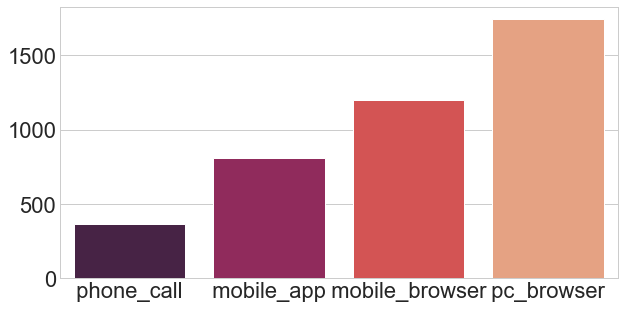

In [50]:
bar_plot(merged_final['device'].value_counts(ascending = True), '')

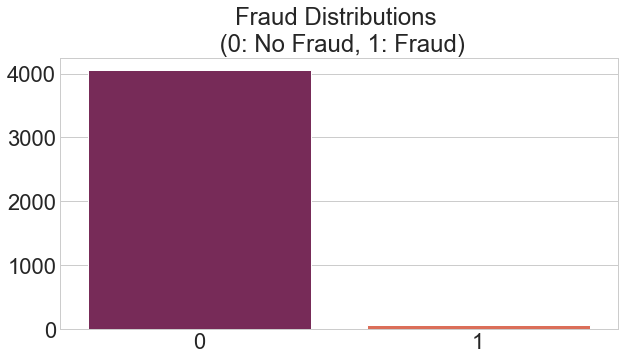

In [51]:
bar_plot(merged_final['fraud'].value_counts(ascending = True), 'Fraud Distributions \n (0: No Fraud, 1: Fraud)')

Analysing only the fraudulent customers

In [52]:
#fraudulent customers only
fraud_df = merged_final[merged_final['fraud'] == 1]
fraud_df.index = range(fraud_df.shape[0])

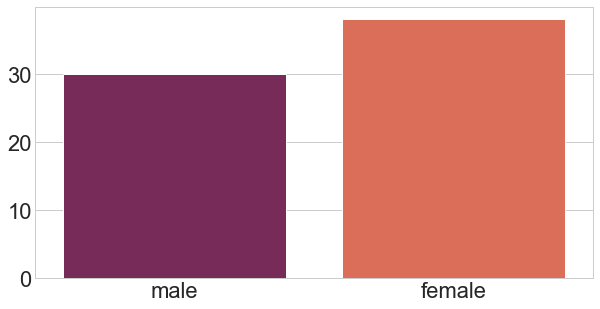

In [53]:
#graph of males and females
bar_plot(fraud_df['holder_gender'].value_counts(ascending = True), "")

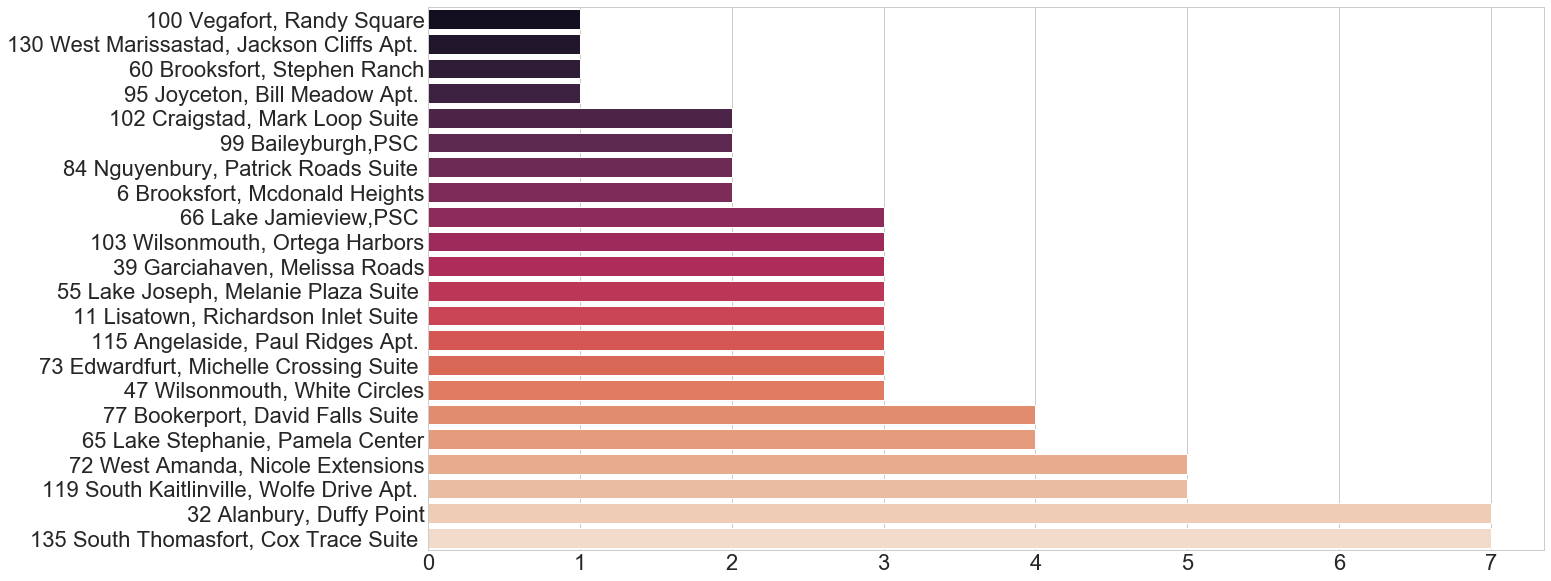

In [60]:
bar_plot_horizontal(fraud_df['address'].value_counts(ascending = True), '')

In [55]:
non_fraud_df = merged_final[merged_final['fraud']==0]

# Genderize (section doesn't work) not finished

Gender discrepancies between people. Annoyingly, this thing is limited to like 10 calls per day, but it's probably the most useful variable in the df.

In [56]:
#not finished
#this cell never works idk why
#don't call this cell more than like 10 times (Genderize() only allows a certain number of calls)

#find gender of fraudulent customers and occupantst
from genderize import Genderize

#dataframe of predicted gender for occupants
gender_predict_holders_df = json_normalize(Genderize().get(merged_final['occupant_first_name']))

#dataframe of predicted gender for holders
gender_predict_occupants_df = json_normalize(Genderize().get(merged_final['holder_first_name']))

GenderizeException: ('Request limit too low to process request', 429, {'Server': 'nginx/1.10.3 (Ubuntu)', 'Date': 'Sun, 21 Jul 2019 04:49:00 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Content-Length': '52', 'Connection': 'keep-alive', 'Access-Control-Allow-Origin': '*', 'Access-Control-Allow-Methods': 'GET', 'Access-Control-Allow-Headers': 'Content-Type', 'ETag': 'W/"34-6zB0LTM5onKr49ShxR6lCk/zFcE"'})

In [61]:
#cell doesn't work either
#predicted gender for occupants
gender_predict_occupants_df = gender_predict_occupants_df.rename(index=str, columns={'gender': 'occupant_predicted_gender', 'probability': 'occupant_gender_probability'})
gender_predict_occupants_df.head()

#predicted gender for holders
gender_predict_holders_df = gender_predict_holders_df.rename(index=str, columns={'gender': 'holder_predicted_gender', 'probability': 'holder_gender_probability'})
gender_predict_holders_df.head()

#merge with final dataframe and reorder columns for readability
merged_final.insert(7, 'holder_predicted_gender', gender_predict_holders_df[['holder_predicted_gender']])
merged_final.insert(8, 'holder_gender_probability', gender_predict_holders_df[['holder_gender_probability']])
merged_final.insert(19, 'occupant_predicted_gender', gender_predict_occupants_df[['occupant_predicted_gender']])
merged_final.insert(20, 'occupant_gender_probability', gender_predict_occupants_df[['occupant_gender_probability']])

NameError: name 'gender_predict_occupants_df' is not defined

# Encoding

one hot encode different columns. If genderize isn't working use the 2nd cell otherwise use the first cell. \n
not sure if label encoding is better or not

In [62]:
"""
not finished
use if genderize is working (includes all variables)

#one hot encode
merged_final = pd.get_dummies(merged_final, prefix_sep="_", columns=['holder_gender', 'holder_predicted_gender', 'occupant_gender', 'occupant_predicted_gender'])
merged_final = merged_final[['transaction_id', 'device', 'action', 'customer_id', 'holder_first_name', 'holder_last_name', 'holder_gender_female', 'holder_gender_male', 'holder_predicted_gender_female', 'holder_predicted_gender_male', 'holder_gender_probability', 'holder_email', 'holder_age', 'address', 'home_type', 'home_square_footage', 'home_number_of_bedrooms', 'home_number_of_floors', 'occupant_first_name', 'occupant_last_name', 'occupant_gender_female', 'occupant_gender_male', 'occupant_predicted_gender_female', 'occupant_predicted_gender_male', 'occupant_gender_probability', 'occupant_age', 'fraud']]                        
merged_final = pd.get_dummies(merged_final, prefix_sep="_", columns=['device'])

merged_final.head()


"""

'\nnot finished\nfix this fcking thing\nuse if genderize is working\n\n\n#one hot encode\nmerged_final = pd.get_dummies(merged_final, prefix_sep="_", columns=[\'holder_gender\', \'holder_predicted_gender\', \'occupant_gender\', \'occupant_predicted_gender\'])\nmerged_final = merged_final[[\'transaction_id\', \'device\', \'action\', \'customer_id\', \'holder_first_name\', \'holder_last_name\', \'holder_gender_female\', \'holder_gender_male\', \'holder_predicted_gender_female\', \'holder_predicted_gender_male\', \'holder_gender_probability\', \'holder_email\', \'holder_age\', \'address\', \'home_type\', \'home_square_footage\', \'home_number_of_bedrooms\', \'home_number_of_floors\', \'occupant_first_name\', \'occupant_last_name\', \'occupant_gender_female\', \'occupant_gender_male\', \'occupant_predicted_gender_female\', \'occupant_predicted_gender_male\', \'occupant_gender_probability\', \'occupant_age\', \'fraud\']]                        \nmerged_final = pd.get_dummies(merged_final, p

In [63]:
#if genderize isn't working

#one hot encode
merged_final = merged_final[['transaction_id', 'device', 'action', 'customer_id', 'holder_first_name', 'holder_last_name', 'holder_email', 'holder_age', 'address', 'home_type', 'home_square_footage', 'home_number_of_bedrooms', 'home_number_of_floors', 'occupant_first_name', 'occupant_last_name', 'occupant_age', 'fraud']]                        
merged_final = pd.get_dummies(merged_final, prefix_sep="_", columns=['device', 'home_type', 'home_number_of_bedrooms', 'home_number_of_floors'])
merged_final = merged_final.drop('home_number_of_floors_1', axis = 1)
merged_final.head()

,transaction_id,action,customer_id,holder_first_name,holder_last_name,holder_email,holder_age,address,home_square_footage,occupant_first_name,occupant_last_name,occupant_age,fraud,device_ mobile_app,device_ mobile_browser,device_ pc_browser,device_ phone_call,home_type_0,home_type_1,home_number_of_bedrooms_1,home_number_of_bedrooms_2,home_number_of_bedrooms_3,home_number_of_bedrooms_4,home_number_of_bedrooms_5
0,001fb590ed3d411,Quote Completed for customer,90bc0a,Ashley,Walker,Ashley Walker@gmail.com,53,"91 Tonytown, Martinez Meadows Apt.",373.9695150875045,Brittany,Walker,49,0,1,0,0,0,0,1,0,1,0,0,0
1,001fb590ed3d411,Quote Completed for customer,90bc0a,Ashley,Walker,Ashley Walker@gmail.com,53,"91 Tonytown, Martinez Meadows Apt.",373.9695150875045,Michele,Walker,12,0,1,0,0,0,0,1,0,1,0,0,0
2,001fb590ed3d411,Quote Completed for customer,90bc0a,Ashley,Walker,Ashley Walker@gmail.com,53,"91 Tonytown, Martinez Meadows Apt.",373.9695150875045,Brian,Walker,13,0,1,0,0,0,0,1,0,1,0,0,0
3,0034ff5a6234469,Quote Completed for customer,3c1b3a,James,Weaver,James Weaver@yahoo.com,50,"54 Nguyenbury, Lam Throughway Suite",195.50685937028786,John,Weaver,51,0,0,0,1,0,1,0,0,0,1,0,0
4,0050a2361f79415,Quote Completed for customer,9034b8,Donna,Wilson,Donna Wilson@robles.com,47,"27 East Brittanytown, Jackson Forge Suite",257.4528005429446,Lisa,Wilson,43,0,0,0,1,0,0,1,0,0,0,0,1


holder_age, home_square_footage, occupant_age are stored as strings. Convert these to float.

In [64]:
merged_final['home_square_footage'] = merged_final['home_square_footage'].astype(float)
merged_final['holder_age'] = merged_final['holder_age'].astype(float)
merged_final['occupant_age'] = merged_final['occupant_age'].astype(float)

# Splitting the Data

Split into train and test sets
adapted from: https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold

print('No Frauds', round(merged_final['fraud'].value_counts()[0]/len(merged_final) * 100,2), '% of the dataset')
print('Frauds', round(merged_final['fraud'].value_counts()[1]/len(merged_final) * 100,2), '% of the dataset')

X = merged_final.drop(['fraud', 'transaction_id', 'action', 'customer_id', 'holder_first_name', 'holder_last_name', 'holder_email', 'address', 'occupant_first_name', 'occupant_last_name', ], axis=1)
Y = merged_final['fraud']

#split data into training and testing sets in a 80:20 ratio
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state = 5)
trainX.head()

No Frauds 98.35 % of the dataset
Frauds 1.65 % of the dataset


,holder_age,home_square_footage,occupant_age,device_ mobile_app,device_ mobile_browser,device_ pc_browser,device_ phone_call,home_type_0,home_type_1,home_number_of_bedrooms_1,home_number_of_bedrooms_2,home_number_of_bedrooms_3,home_number_of_bedrooms_4,home_number_of_bedrooms_5
1228,57.0,263.053938,55.0,1,0,0,0,0,1,0,0,1,0,0
2616,47.0,179.964247,44.0,0,1,0,0,1,0,0,0,1,0,0
2684,55.0,350.604581,64.0,0,0,1,0,0,1,0,0,1,0,0
202,51.0,393.497093,11.0,0,0,1,0,0,1,0,1,0,0,0
2881,56.0,150.528459,9.0,0,0,1,0,1,0,0,0,1,0,0


Create sample dataframe (of 1000 entries). Dataframe is balanced: 500 fraudulent entries and 500 non-fraudulent entries. 

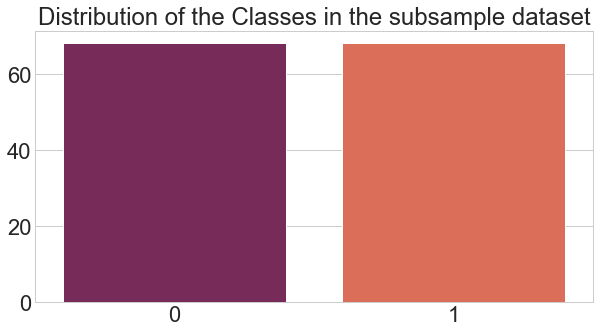

In [66]:
def shuffle_dataframe(dataframe):
    
    """
    function to shuffle a dataframe.
    
    Uses random state = 42 and frac = 1
    """

    return dataframe.sample(frac = 1, random_state = 42)

def balanced_sample(df):
    
    """
    function that creates a sample of 1000 entries. 
    
    The sample is balanced so it has 500 fraudulent entries and 500 non-fraudulent entries.
    
    If the dataframe entered is too small the function will aim to deliver equal amounts of fraud and non-fraudulent entries
    """
    
    #get fraud df
    fraud_df = df.loc[df['fraud'] == 1][:500]
    
    #get non_fraud df
    non_fraud_df = df.loc[df['fraud'] == 0][:len(fraud_df)]
    
    #concat both df
    normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

    #shuffle dataframe
    new_df = shuffle_dataframe(normal_distributed_df)

    return new_df

#for testing purposes create sample dataframe
#shuffle and balance this dataframe

sample = balanced_sample(shuffle_dataframe(merged_final))
bar_plot(sample['fraud'].value_counts(ascending = True), 'Distribution of the Classes in the subsample dataset')

# Correlation Matrix

To find which features are helpful in predicting fraud

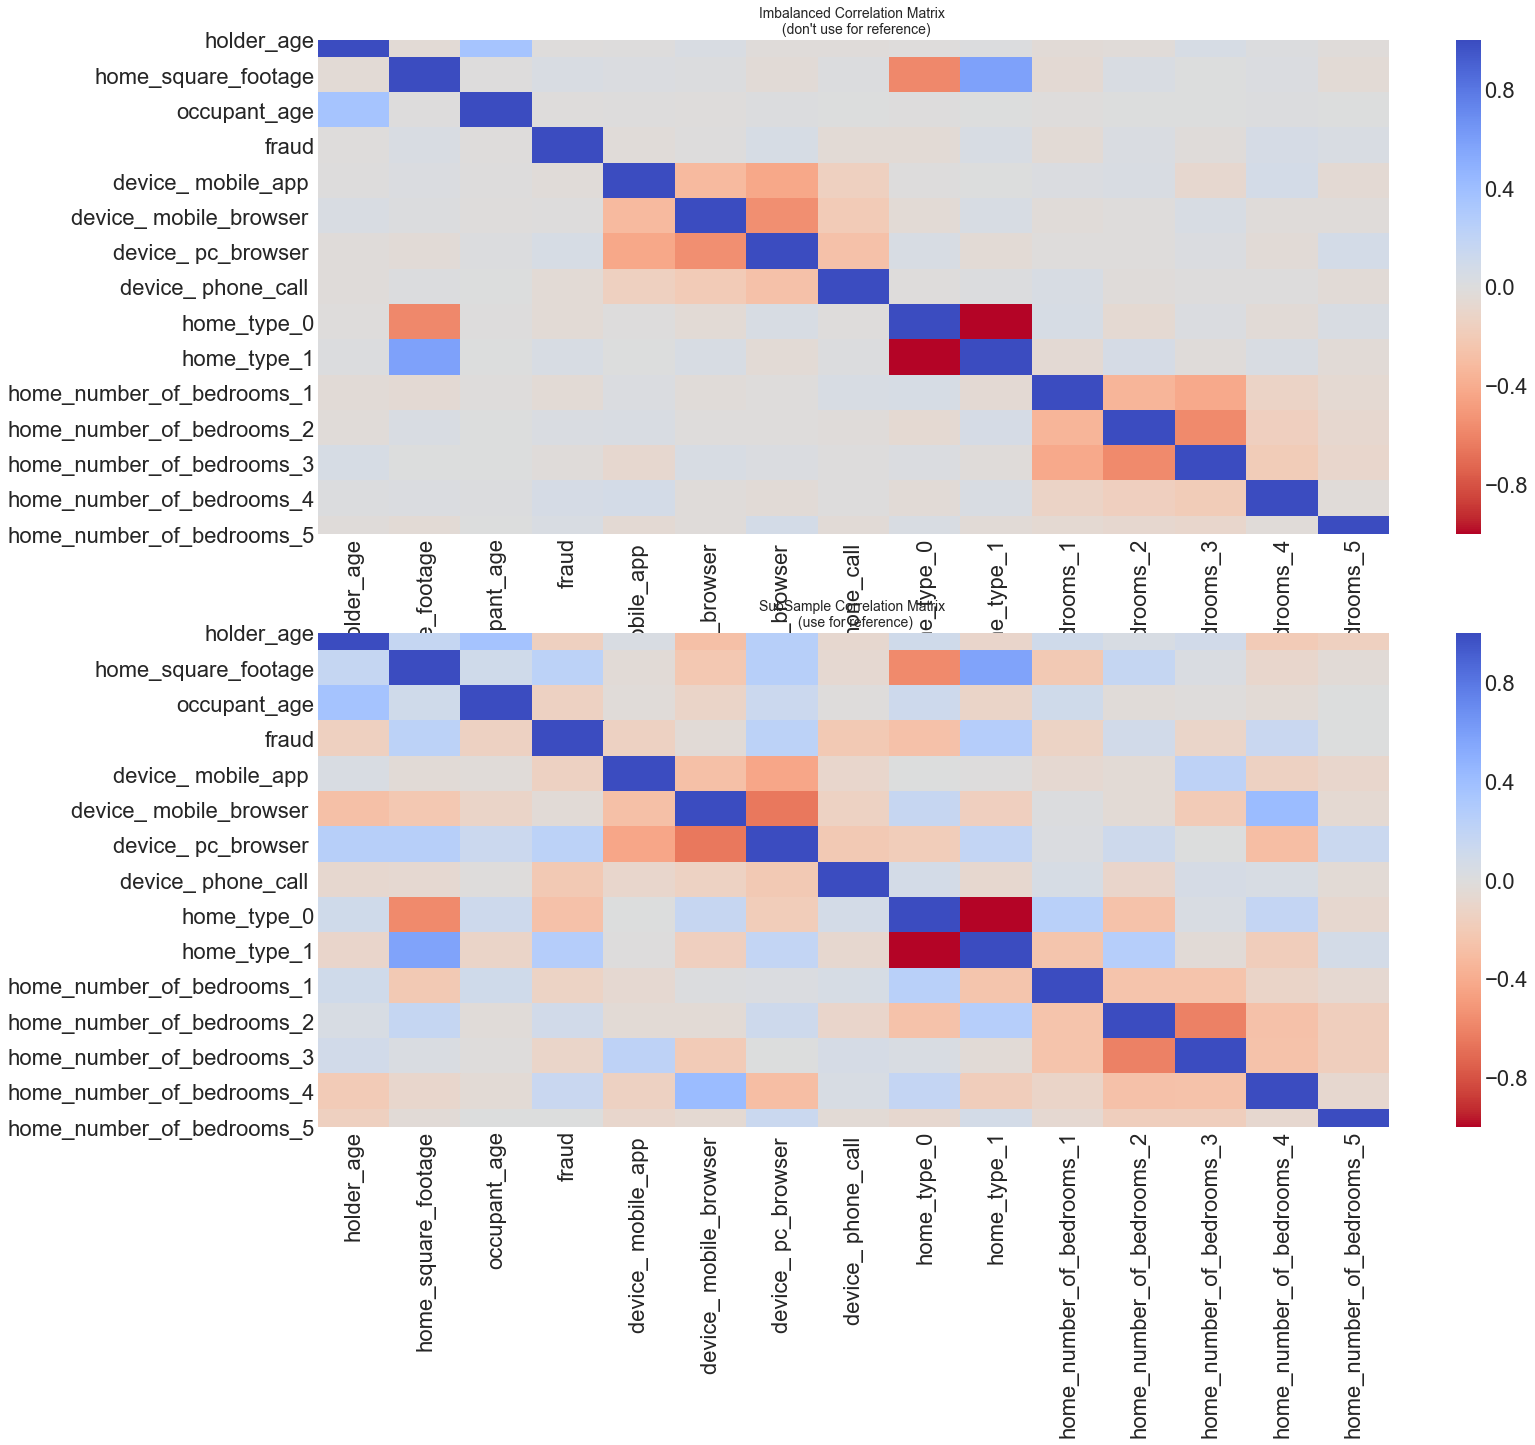

In [67]:
#copied from: https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

#change font size
plt.rcParams.update({'font.size': 20})

# Entire DataFrame
corr = merged_final.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

sub_sample_corr = sample.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

There seems to be a correlation between using a mobile_app or mobiel browser and committing insurance fraud. There also seems to be a strong correlation between having a home_type of 1 and committing insurance fraud.

Comparing fradulent customers with genuine customers in order to find which variables are useful. Will use heatmap to conduct analysis.

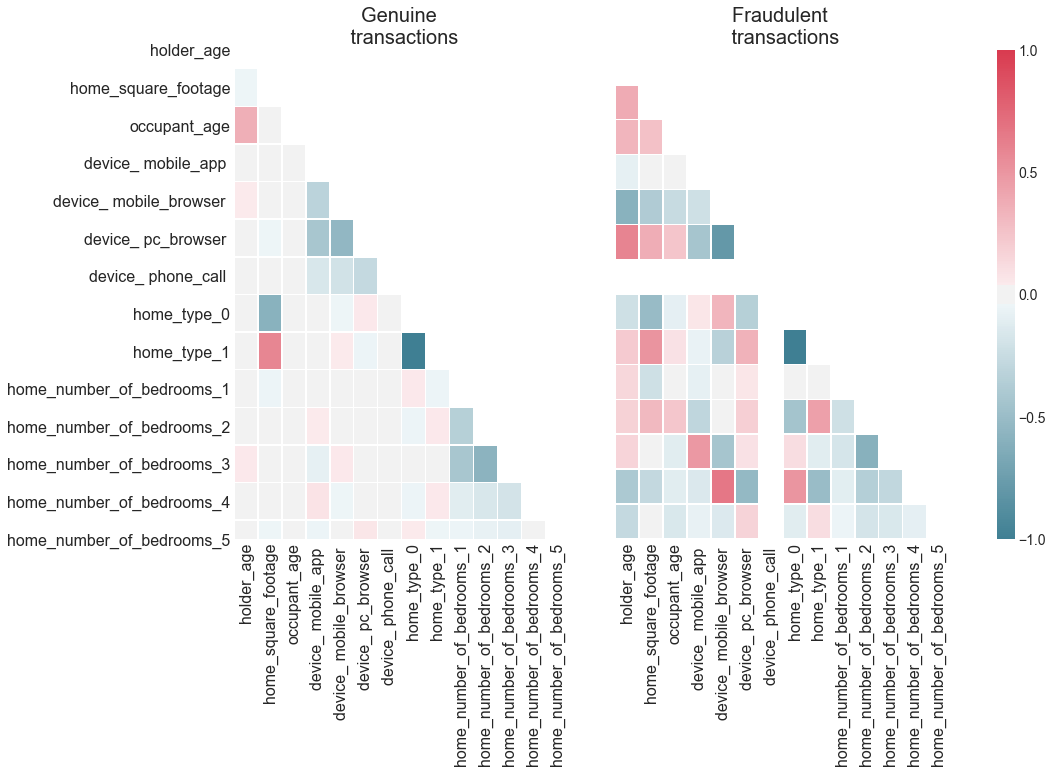

In [68]:
#copied from: https://www.kaggle.com/arjunjoshua/predicting-fraud-in-financial-payment-services
def correlation_matrix_contrasting(X, Y):
    
    """
    function to make two correlation matrices. 
    
    One of only fraudulent entries and another with only genuine entries. 
    
    Takes Y vector as a fraud column, and X matrix as the other variables.
    """
    
    Xfraud = X.loc[Y == 1] # update Xfraud & XnonFraud with cleaned data
    XnonFraud = X.loc[Y == 0]

    correlationNonFraud = XnonFraud.loc[:, X.columns != 'fraud'].corr()
    mask = np.zeros_like(correlationNonFraud)
    indices = np.triu_indices_from(correlationNonFraud)
    mask[indices] = True

    grid_kws = {'width_ratios': (.9, .9, .05), 'wspace': 0.2}
    f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, figsize = (14, 9))

    cmap = sns.diverging_palette(220, 8, as_cmap = True)
    ax1 = sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
    ax1.set_xticklabels(ax1.get_xticklabels(), size = 16)
    ax1.set_yticklabels(ax1.get_yticklabels(), size = 16)
    ax1.set_title('Genuine \n transactions', size = 20)

    correlationFraud = Xfraud.loc[:, X.columns != 'fraud'].corr()
    ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', 'ticks': [-1, -0.5, 0, 0.5, 1]})
    ax2.set_xticklabels(ax2.get_xticklabels(), size = 16)
    ax2.set_title('Fraudulent \n transactions', size = 20)

    cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14)
    
correlation_matrix_contrasting(merged_final.drop('fraud', axis = 1), merged_final['fraud'])


Clearly, there is a huge difference in correlation of variables between fraudulent and genuine entries. This should be useful in providing a trend from which we can build ML models

# Model 1: XGBoost 
copied from: https://www.kaggle.com/arjunjoshua/predicting-fraud-in-financial-payment-services


"*Selection of ML algorithm*: A first approach to deal with imbalanced data is to balance it by discarding the majority class before applying an ML algorithm. The disadvantage of  undersampling is that a model trained in this way will not perform well on real-world skewed test data since almost all the information was discarded. A better approach might be to oversample the minority class, say by the synthetic minority oversampling technique (SMOTE) contained in the 'imblearn' library. Motivated by this, I tried a variety of anomaly-detection and supervised learning approaches. I find, however, that the best result is obtained on the original dataset by using a ML algorithm based on ensembles of decision trees that intrinsically performs well on imbalanced data. Such algorithms not only allow for constructing a model that can cope with the missing values in our data, but they naturally allow for speedup via parallel-processing. Among these algorithms, the extreme gradient-boosted (XGBoost) algorithm used below slightly outperforms random-forest. Finally, XGBoost, like several other ML algorithms, allows for weighting the positive class more compared to the negative class --- a setting that also allows to account for the skew in the data." - https://www.kaggle.com/arjunjoshua/predicting-fraud-in-financial-payment-services

In [69]:
#takes a while

import xgboost as xgb
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score

weights = (Y == 0).sum() / (1.0 * (Y == 1).sum())
clf = xgb.XGBClassifier(max_depth = 3, scale_pos_weight = weights, n_jobs = 4)
probabilities = clf.fit(trainX, trainY).predict_proba(testX)
print('AUPRC = {}'.format(average_precision_score(testY, probabilities[:, 1])))

AUPRC = 0.6214276569847221


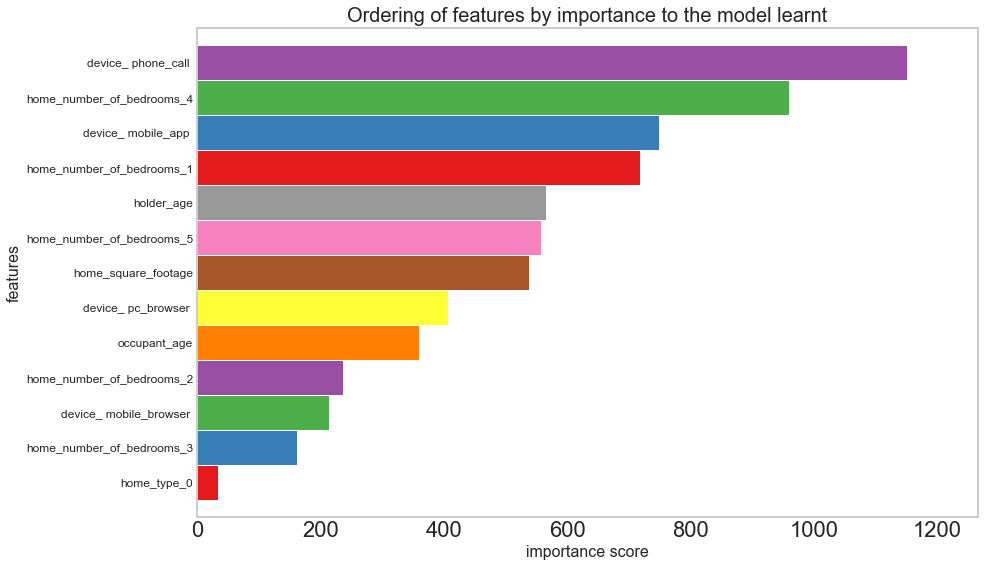

In [70]:
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = xgb.plot_importance(clf, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

Visualisation of ML model

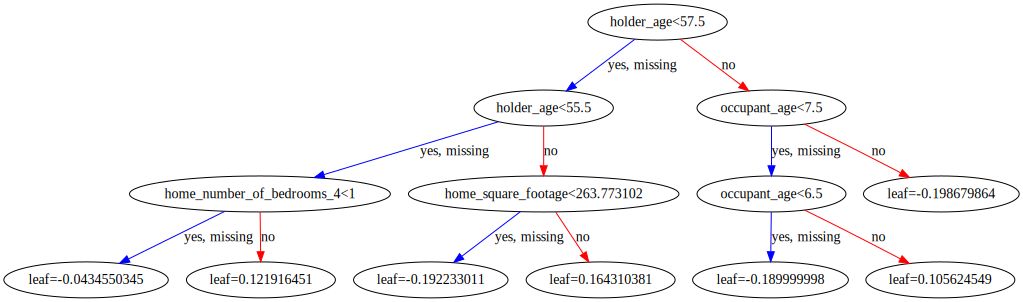

In [71]:
xgb.to_graphviz(clf)

Make predictions using model

Accuracy: 96.36%
XGBoost Classifier:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       808
           1       0.35      1.00      0.52        16

    accuracy                           0.96       824
   macro avg       0.67      0.98      0.75       824
weighted avg       0.99      0.96      0.97       824



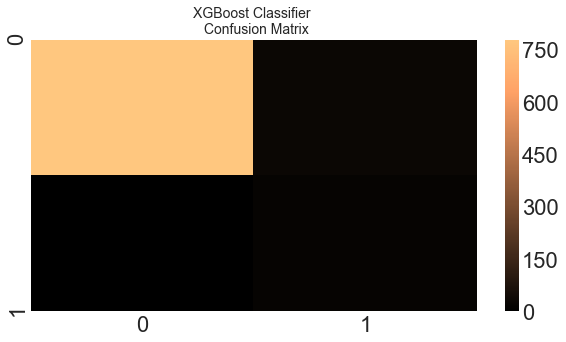

In [72]:
#copied from: https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

y_pred_xgb = clf.predict(testX)
predictions = [i for i in y_pred_xgb]

#accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(testY, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

#confusion matrix (graph)
from sklearn.metrics import confusion_matrix
xgb_cm = confusion_matrix(testY, y_pred_xgb)

fig, ax = plt.subplots(1, 1,figsize=(10,5))
sns.heatmap(xgb_cm, ax=ax, cmap=plt.cm.copper)
ax.set_title("XGBoost Classifier \n Confusion Matrix", fontsize=14)

#precision    recall  f1-score
from sklearn.metrics import classification_report
print('XGBoost Classifier:')
print(classification_report(testY, y_pred_xgb))

From the graph, the model correctly classifies true negatives (top left square), while minimising false negatives (top right square) and false positives (bottom left square). However it fails to capture true positives (bottom right square) - which is pretty much the whole point of this assignment. So yeah, it needs work lol

# Stuff to be completed

In [ ]:
"""

1. improve performance (reducing time taken for JSON_to_dataframe would really help)

2. feature engineering: add more features to the model (eg. adding suburb, street, street number, emial provider, etc. to df)

3. build more models (probably do this once 1 and 2 have been completed first)

4. 

"""